In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings 
from io import StringIO
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [3]:
data=pd.read_csv(r'practice_data.csv')
data.head(10)

,EmployeeID,gender,department,Days Present,Accuracy_of_Work,Meeting Project Deadlines,Task Completion Rates,Interpersonal Skills Rating,Decision-Making Skills Rating,Sales Revenue Generated,churned
0,1,Male,Sales,20,High,Yes,85,8,7,51638,No
1,2,Female,Marketing,22,Medium,Yes,90,7,6,97797,Yes
2,3,Male,Human Resources,25,High,No,80,9,8,95341,No
3,4,Male,Engineering,19,Low,Yes,75,6,5,91806,No
4,5,Female,Finance,23,Medium,Yes,85,7,7,64247,Yes
5,6,Male,Sales,21,High,Yes,95,8,8,89988,No
6,7,Female,Marketing,24,Low,No,70,5,4,70934,Yes
7,8,Male,Human Resources,18,Medium,Yes,80,6,6,96578,No
8,9,Male,Engineering,20,High,Yes,90,8,7,74219,No
9,10,Female,Finance,22,Medium,Yes,85,7,6,87009,Yes


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   EmployeeID                     31 non-null     int64 
 1   gender                         31 non-null     object
 2   department                     31 non-null     object
 3   Days Present                   31 non-null     int64 
 4   Accuracy_of_Work               31 non-null     object
 5   Meeting Project Deadlines      31 non-null     object
 6   Task Completion Rates          31 non-null     int64 
 7   Interpersonal Skills Rating    31 non-null     int64 
 8   Decision-Making Skills Rating  31 non-null     int64 
 9   Sales Revenue Generated        31 non-null     int64 
 10  churned                        31 non-null     object
dtypes: int64(6), object(5)
memory usage: 2.8+ KB


Feature encoding is the process of converting categorical data into a numerical format 
so that machine learning models can work with it effectively. In Python, particularly with libraries 
like pandas and scikit-learn, there are several common encoding techniques:
 1. Label Encoding   -> use in case of encoding  Ordinal data 
 2. One-Hot Encoding ->  use in case of encoding Nominal data with few categories
 3. Ordinal Encoding ->  use in case of encoding Ordinal data with known order
 4. Binary/Hashing   ->  use in case of encoding High-cardinality nominal data
 5. Target Encoding  -> use in case of encoding Nominal data for tree-based models


In [5]:
# feature label Encoding 
encoder = LabelEncoder()
data['encoded_gender'] = encoder.fit_transform(data['gender'])
data

,EmployeeID,gender,department,Days Present,Accuracy_of_Work,Meeting Project Deadlines,Task Completion Rates,Interpersonal Skills Rating,Decision-Making Skills Rating,Sales Revenue Generated,churned,encoded_gender
0,1,Male,Sales,20,High,Yes,85,8,7,51638,No,1
1,2,Female,Marketing,22,Medium,Yes,90,7,6,97797,Yes,0
2,3,Male,Human Resources,25,High,No,80,9,8,95341,No,1
3,4,Male,Engineering,19,Low,Yes,75,6,5,91806,No,1
4,5,Female,Finance,23,Medium,Yes,85,7,7,64247,Yes,0
5,6,Male,Sales,21,High,Yes,95,8,8,89988,No,1
6,7,Female,Marketing,24,Low,No,70,5,4,70934,Yes,0
7,8,Male,Human Resources,18,Medium,Yes,80,6,6,96578,No,1
8,9,Male,Engineering,20,High,Yes,90,8,7,74219,No,1
9,10,Female,Finance,22,Medium,Yes,85,7,6,87009,Yes,0


Questions for this assignment
What is the first value of the gender column after performing the label encoding?

 Answer: First value of the gender column after performing the label encoding is 1

In [6]:
# One Hot Encoding
df = pd.DataFrame({'color': ['red', 'green', 'blue']})
encoded_df = pd.get_dummies(df, columns=['color'])

print(encoded_df)

   color_blue  color_green  color_red
0           0            0          1
1           0            1          0
2           1            0          0


In [8]:
# Original Encoding 
from sklearn.preprocessing import OrdinalEncoder

df2 = [['low'], ['medium'], ['high']]
encoder = OrdinalEncoder(categories=[['low', 'medium', 'high']])
encoded = encoder.fit_transform(df2)

print(encoded)  # e.g., [[0.], [1.], [2.]]

[[0.]
 [1.]
 [2.]]


In [11]:
pip install category_encoders


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [12]:
# Binary Encoding, Hashing Encoding, Target Encoding
# These are more advanced and useful when you have high-cardinality features (many unique values).
import category_encoders as ce

df3 = pd.DataFrame({'city': ['London', 'Paris', 'Berlin', 'Paris']})
encoder = ce.BinaryEncoder(cols=['city'])
encoded_df3 = encoder.fit_transform(df3)

print(encoded_df3)


   city_0  city_1
0       0       1
1       1       0
2       1       1
3       1       0


# New Task 16-05-25

In [13]:
# working on main practice dataset.
data.head(10)

,EmployeeID,gender,department,Days Present,Accuracy_of_Work,Meeting Project Deadlines,Task Completion Rates,Interpersonal Skills Rating,Decision-Making Skills Rating,Sales Revenue Generated,churned,encoded_gender
0,1,Male,Sales,20,High,Yes,85,8,7,51638,No,1
1,2,Female,Marketing,22,Medium,Yes,90,7,6,97797,Yes,0
2,3,Male,Human Resources,25,High,No,80,9,8,95341,No,1
3,4,Male,Engineering,19,Low,Yes,75,6,5,91806,No,1
4,5,Female,Finance,23,Medium,Yes,85,7,7,64247,Yes,0
5,6,Male,Sales,21,High,Yes,95,8,8,89988,No,1
6,7,Female,Marketing,24,Low,No,70,5,4,70934,Yes,0
7,8,Male,Human Resources,18,Medium,Yes,80,6,6,96578,No,1
8,9,Male,Engineering,20,High,Yes,90,8,7,74219,No,1
9,10,Female,Finance,22,Medium,Yes,85,7,6,87009,Yes,0


In [18]:
print(data.columns)

Index(['EmployeeID', 'gender', 'department', 'Days Present',
       'Accuracy_of_Work', 'Meeting Project Deadlines',
       'Task Completion Rates', 'Interpersonal Skills Rating',
       'Decision-Making Skills Rating', 'Sales Revenue Generated', 'churned',
       'encoded_gender'],
      dtype='object')


In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   EmployeeID                     31 non-null     int64 
 1   gender                         31 non-null     object
 2   department                     31 non-null     object
 3   Days Present                   31 non-null     int64 
 4   Accuracy_of_Work               31 non-null     object
 5   Meeting Project Deadlines      31 non-null     object
 6   Task Completion Rates          31 non-null     int64 
 7   Interpersonal Skills Rating    31 non-null     int64 
 8   Decision-Making Skills Rating  31 non-null     int64 
 9   Sales Revenue Generated        31 non-null     int64 
 10  churned                        31 non-null     object
 11  encoded_gender                 31 non-null     int32 
dtypes: int32(1), int64(6), object(5)
memory usage: 2.9+ KB


In [33]:
# feature label Encoding 
encoder = LabelEncoder()
data['encoded_churned'] = encoder.fit_transform(data['churned'])
data.head(5)

,EmployeeID,gender,department,Days Present,Accuracy_of_Work,Meeting Project Deadlines,Task Completion Rates,Interpersonal Skills Rating,Decision-Making Skills Rating,Sales Revenue Generated,churned,encoded_gender,encoded_churned
0,1,Male,Sales,20,High,Yes,85,8,7,51638,No,1,0
1,2,Female,Marketing,22,Medium,Yes,90,7,6,97797,Yes,0,1
2,3,Male,Human Resources,25,High,No,80,9,8,95341,No,1,0
3,4,Male,Engineering,19,Low,Yes,75,6,5,91806,No,1,0
4,5,Female,Finance,23,Medium,Yes,85,7,7,64247,Yes,0,1
5,6,Male,Sales,21,High,Yes,95,8,8,89988,No,1,0
6,7,Female,Marketing,24,Low,No,70,5,4,70934,Yes,0,1
7,8,Male,Human Resources,18,Medium,Yes,80,6,6,96578,No,1,0
8,9,Male,Engineering,20,High,Yes,90,8,7,74219,No,1,0
9,10,Female,Finance,22,Medium,Yes,85,7,6,87009,Yes,0,1


In [34]:
# Correlation with target
correlation = data.corr()
print(correlation['encoded_churned'].sort_values(ascending=False))

encoded_churned                  1.000000
Sales Revenue Generated          0.107369
EmployeeID                       0.087706
Task Completion Rates            0.040754
Interpersonal Skills Rating     -0.085794
Days Present                    -0.092834
Decision-Making Skills Rating   -0.180466
encoded_gender                  -1.000000
Name: encoded_churned, dtype: float64


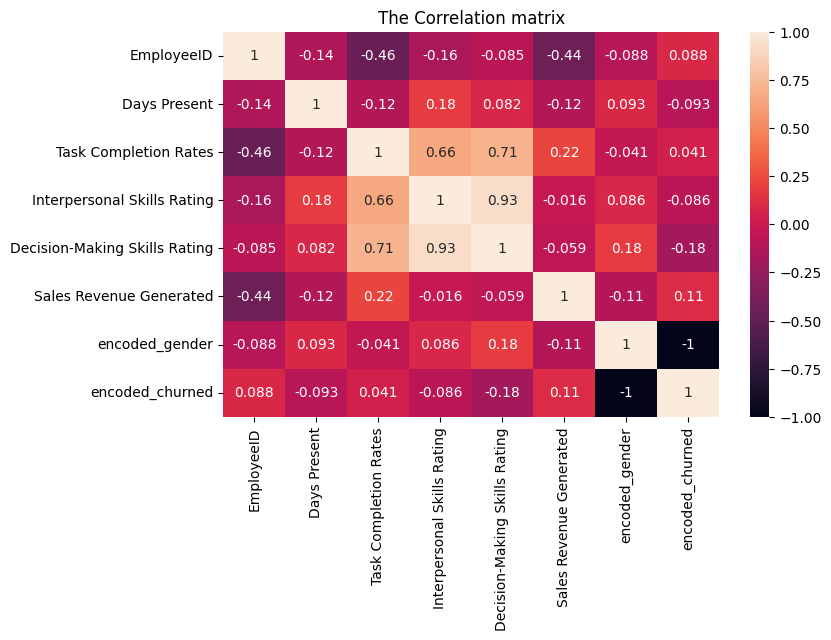

In [36]:
# Suppress all warnings
warnings.filterwarnings('ignore')

# Compute correlation matrix
correlation_matrix = data.corr()

plt.figure(figsize=(8, 5))
sns.heatmap(correlation_matrix, annot=True)
plt.title('The Correlation matrix')
plt.show()

In [37]:
x = data.drop(['gender','department','churned','Accuracy_of_Work','Meeting Project Deadlines'], axis=1)
y = data['churned']
x.head(5)

,EmployeeID,Days Present,Task Completion Rates,Interpersonal Skills Rating,Decision-Making Skills Rating,Sales Revenue Generated,encoded_gender,encoded_churned
0,1,20,85,8,7,51638,1,0
1,2,22,90,7,6,97797,0,1
2,3,25,80,9,8,95341,1,0
3,4,19,75,6,5,91806,1,0
4,5,23,85,7,7,64247,0,1


Standerd scaler 

In [38]:
scaler = StandardScaler()
scaled = scaler.fit_transform(x)

MinMax Scaler

In [40]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled = scaler.fit_transform(x)

PCA (Principal Component Analysis) in Python
PCA is a dimensionality reduction technique that:

Combines correlated features into new, uncorrelated features (called principal components)

Helps with visualization, speed, and removing noise

When to Use PCA
Too many features (high-dimensional data)

Features are correlated

Want to reduce features while preserving variance

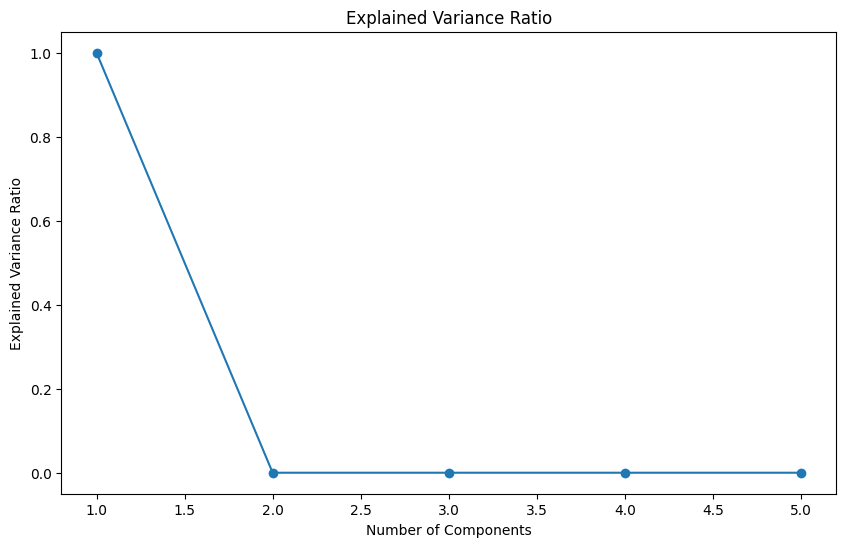

In [49]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 5)
x_pca = pca.fit_transform(x)

evr = pca.explained_variance_ratio_
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(evr) + 1), evr, marker='o')
plt.title('Explained Variance Ratio')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.show()

# Train-Test Split

What is Train-Test Split?
Train-test split is a fundamental step in building and evaluating machine learning models.

Definition:
It’s the process of dividing your dataset into:

Training set: Used to train the model.

Testing set: Used to evaluate the model's performance on unseen data.

 Why Do It?
If you train and test on the same data, the model might just memorize it (overfitting), not truly learn patterns that generalize.

Train-test split helps you check:

How well the model learned

Whether it will perform well on new (real-world) data

In [52]:
from sklearn.model_selection import train_test_split

In [54]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

We splits your data into training and testing sets

We train the model on x_train, y_train

We test (evaluate) the model on x_test, y_test to see how well it performs on unseen data
